In [2]:
import warnings
import mglearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(["blue", "red"])[y]
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

print("Форма массива X_test: {}".format(X_test.shape))
print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))
print("Решающая функция с порогом отсечения:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Форма массива X_test: (25, 2)
Форма решающей функции: (25,)
Решающая функция:
[ 4.13592603 -1.67785652 -3.95106099 -3.62604651  4.28986642  3.66166081]
Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [4]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred идентичен прогнозам: {}".format(np.all(pred == gbrt.predict(X_test))))
decision_function = gbrt.decision_function(X_test)
print("Решающая функция минимум: {:.2f} максимум: {:.2f}".format(np.min(decision_function),
                                                                 np.max(decision_function)))

pred идентичен прогнозам: True
Решающая функция минимум: -7.69 максимум: 4.29


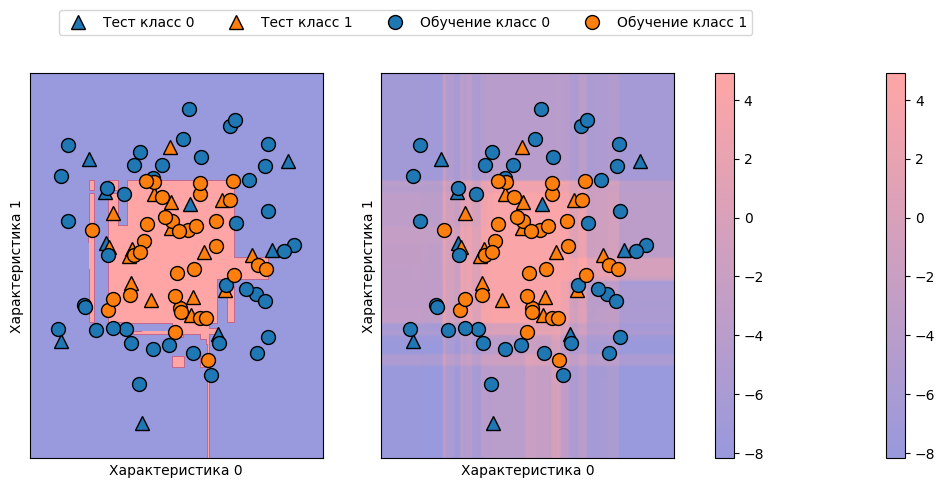

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0", "Обучение класс 1"], ncol=4,
                   loc=(.1, 1.1))
plt.show()

In [6]:
print("Форма вероятностей: {}".format(gbrt.predict_proba(X_test).shape))
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test[:6])))

Форма вероятностей: (25, 2)
Спрогнозированные вероятности:
[[0.01573626 0.98426374]
 [0.84262049 0.15737951]
 [0.98112869 0.01887131]
 [0.97406909 0.02593091]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


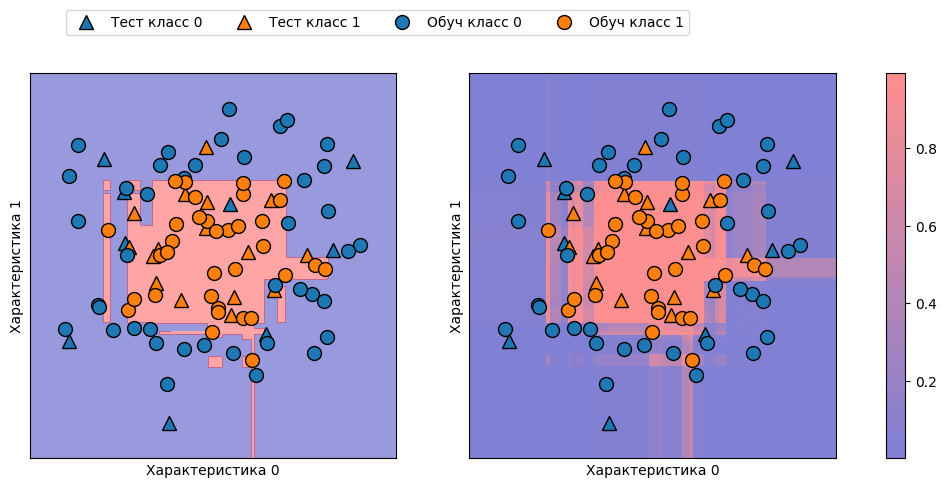

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Тест класс 0", "Тест класс 1", "Обуч класс 0", "Обуч класс 1"], ncol=4, loc=(.1,
                                                                                              1.1))
plt.show()

In [8]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("Argmax решающей функции:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test)[:6]))
print("Суммы: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))
print("Argmax спрогнозированных вероятностей:\n{}".format(np.argmax(gbrt.predict_proba(X_test),
                                                                    axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Форма решающей функции: (38, 3)
Решающая функция:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]
Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Спрогнозированные вероятности:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Суммы: [1. 1. 1. 1. 1. 1.]
Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [9]:
logreg = LogisticRegression()
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("уникальные классы в обучающем наборе: {}".format(logreg.classes_))
print("прогнозы: {}".format(logreg.predict(X_test)[:10]))

уникальные классы в обучающем наборе: ['setosa' 'versicolor' 'virginica']
прогнозы: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


In [10]:
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax решающей функции: {}".format(argmax_dec_func[:10]))
print("argmax объединенный с классами_: {}".format(logreg.classes_[argmax_dec_func][:10]))

argmax решающей функции: [1 0 2 1 1 0 1 2 1 1]
argmax объединенный с классами_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
